# Models for the CS4641 Project

## Overview

This notebook contains the models used for Group 8's CS4641 Project, focused on predicting upticks in the financial market.
The models used are:
- Linear Regression
- Support Vector Machine (SVM)
- Long Short-Term Memory (LSTM) Neural Network

The data used is from the S&P 500 index, using open-source data. The data for each of the used indices are found in the data directory.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.svm import *
from src.lstm import *
from src.linreg import *
from src.utils import *

## Support Vector Machine (SVM)

In [4]:
dataset, labels, standard_scaler = svm_load_dataset('AAPL')
dataset = run_pca(dataset)
train, test, train_target, test_target = svm_split_data(dataset, labels)

In [5]:
svm = create_svm(train, train_target)

In [6]:
predictions = svm.predict(test)

In [7]:
accuracy, precision, recall, f1 = evaluate_class(predictions, test_target)
print("=== METRICS FOR SVM ===")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

=== METRICS FOR SVM ===
Accuracy: 0.49193548387096775
Precision: 0.8571428571428571
Recall: 0.04580152671755725
F1 Score: 0.08695652173913043


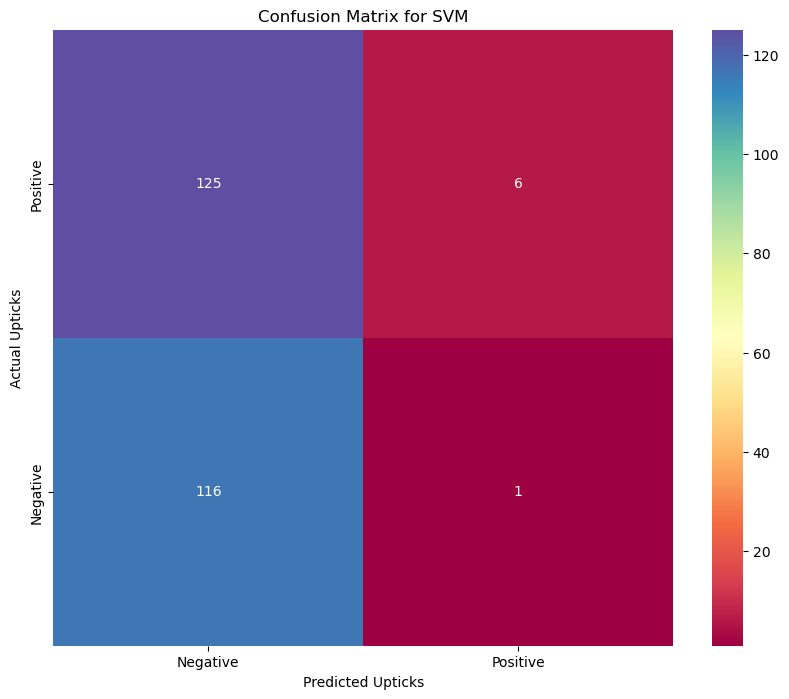

In [8]:
plot_confusion_matrix(y_pred=predictions, y_actual=test_target, method="SVM")

## Long Short-Term Memory (LSTM) Neural Network

In [97]:
stock_data = lstm_load_data('AAPL')
dataset, classifier_labels, scaler = lstm_load_dataset(stock_data)
train, test = lstm_split_data(dataset)

In [68]:
# HYPERPARAMETERS
epochs = 512
batch_size = 16
learning_rate=5e-6

lstm_reg = create_lstm_reg()
lstm_reg = train_lstm_reg(lstm_reg, train, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate)

Epoch 1/256
56/56 [==============================] - 2s 14ms/step - loss: 0.2419 - val_loss: 0.4960
Epoch 2/256
56/56 [==============================] - 1s 11ms/step - loss: 0.2395 - val_loss: 0.4925
Epoch 3/256
56/56 [==============================] - 1s 12ms/step - loss: 0.2375 - val_loss: 0.4882
Epoch 4/256
56/56 [==============================] - 1s 12ms/step - loss: 0.2352 - val_loss: 0.4846
Epoch 5/256
56/56 [==============================] - 1s 11ms/step - loss: 0.2334 - val_loss: 0.4817
Epoch 6/256
56/56 [==============================] - 1s 12ms/step - loss: 0.2319 - val_loss: 0.4794
Epoch 7/256
56/56 [==============================] - 1s 12ms/step - loss: 0.2305 - val_loss: 0.4770
Epoch 8/256
56/56 [==============================] - 1s 12ms/step - loss: 0.2289 - val_loss: 0.4743
Epoch 9/256
56/56 [==============================] - 1s 12ms/step - loss: 0.2271 - val_loss: 0.4711
Epoch 10/256
56/56 [==============================] - 1s 12ms/step - loss: 0.2251 - val_loss: 0.4678

In [115]:
x_test_reg, y_test_reg = create_sequences_reg(test)
y_test_reg = y_test_reg.reshape(-1, 1)

In [116]:
y_pred_reg = lstm_reg.predict(x_test_reg)

8/8 [==============================] - 0s 2ms/step


In [117]:
y_pred_reg = scaler.inverse_transform(y_pred_reg)
y_test_reg = scaler.inverse_transform(y_test_reg)

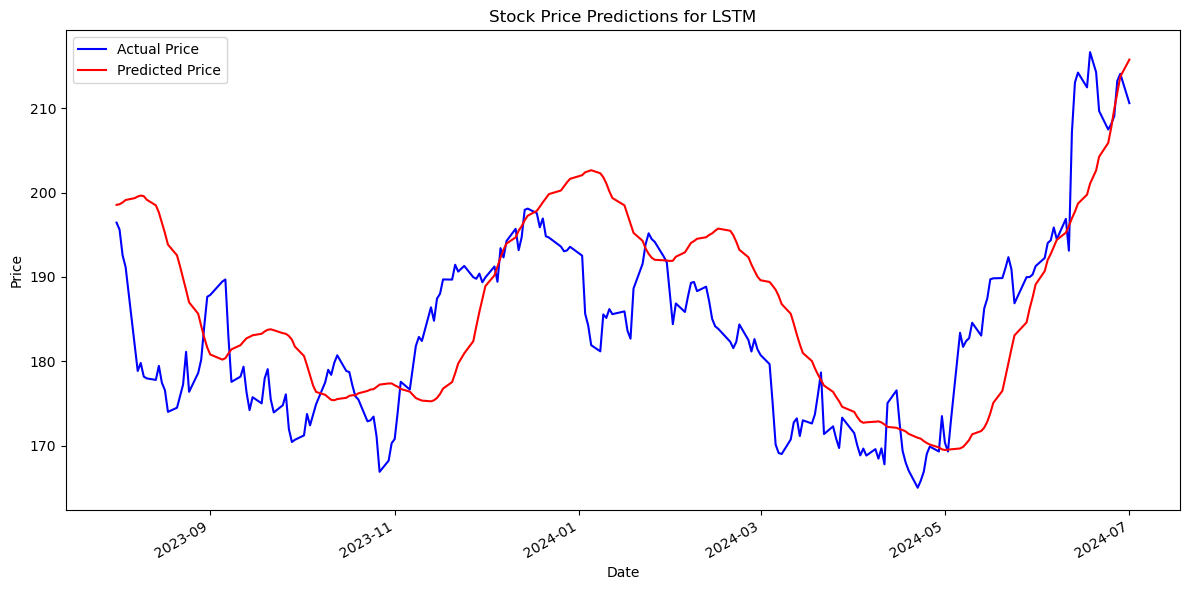

In [118]:
plot_reg_predictions(stock_data, y_pred_reg, y_test_reg, "LSTM")

In [119]:
error_metrics = get_rmse_metrics(y_test_reg, y_pred_reg)
print(f"The root mean squared error is {error_metrics['rmse']}")

The root mean squared error is 9.200562477111816


In [120]:
# Get classifications from regression upticks
y_class = np.where(y_test_reg[1:] > y_test_reg[:-1], 1, 0)
y_pred = np.where(y_pred_reg[1:] > y_pred_reg[:-1], 1, 0)

In [121]:
accuracy, precision, recall, f1 = evaluate_class(y_pred, y_class)
print("=== METRICS FOR LSTM ===")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

=== METRICS FOR LSTM ===
Accuracy: 0.5043478260869565
Precision: 0.5245901639344263
Recall: 0.5333333333333333
F1 Score: 0.5289256198347108


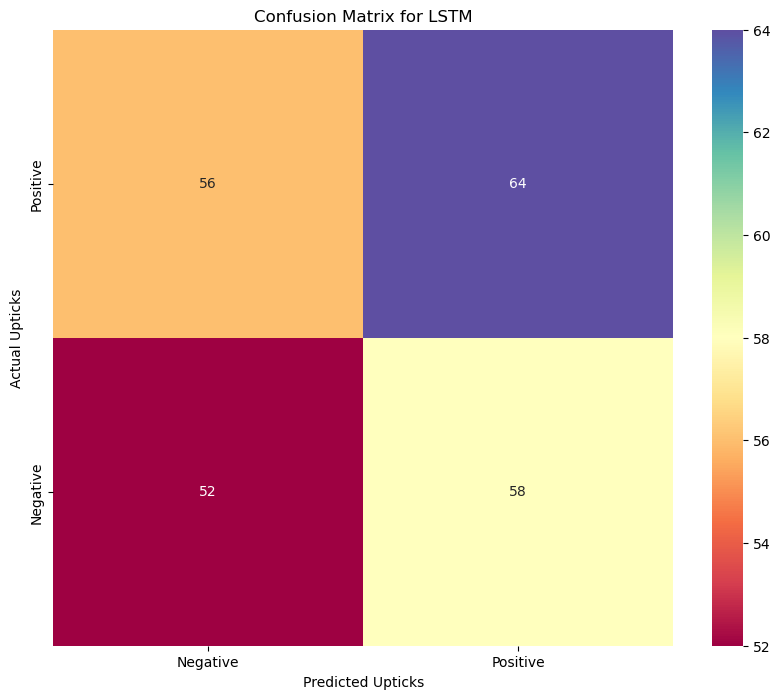

In [122]:
plot_confusion_matrix(y_pred=y_pred, y_actual=y_class, method="LSTM")

## Linear Regression

In [123]:
stock_data = lstm_load_data('AAPL') # LSTM methods for data processing work in some cases here
dataset, _, scaler = lstm_load_dataset(stock_data)
train, test = lstm_split_data(dataset)

In [124]:
linreg = train_linear_regression(train)

In [125]:
x_test_lin, y_test_lin = create_sequences_reg(test)
x_test_lin = x_test_lin.reshape(x_test_lin.shape[0], -1)
y_pred_lin = linreg.predict(x_test_lin)

In [126]:
y_pred_lin = scaler.inverse_transform(y_pred_lin)
y_test_lin = scaler.inverse_transform(y_test_lin)

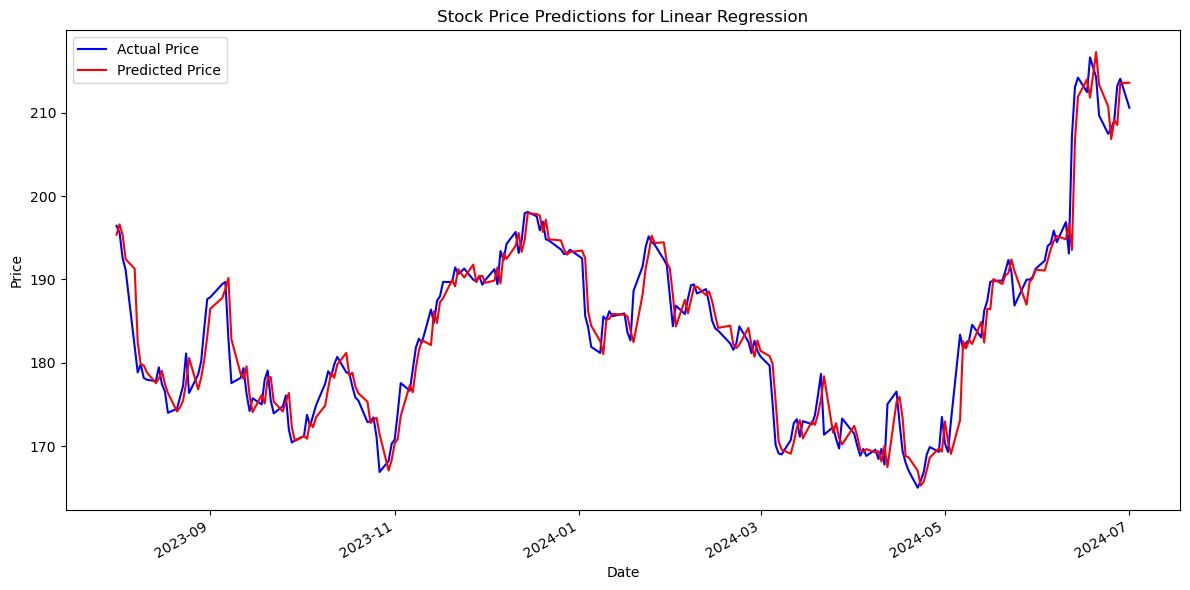

In [127]:
plot_reg_predictions(stock_data, y_pred_lin, y_test_lin, "Linear Regression")

In [128]:
error_metrics = get_rmse_metrics(y_test_lin, y_pred_lin)
print(f"The root mean squared error is {error_metrics['rmse']}")

The root mean squared error is 2.647059440612793


In [129]:
# Get classification labels from regression for upticks
y_class = np.where(y_test_lin[1:] > y_test_lin[:-1], 1, 0)
y_pred = np.where(y_pred_lin[1:] > y_pred_lin[:-1], 1, 0)

In [130]:
accuracy, precision, recall, f1 = evaluate_class(y_pred, y_class)
print("=== METRICS FOR LINEAR REGRESSION ===")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

=== METRICS FOR LINEAR REGRESSION ===
Accuracy: 0.5217391304347826
Precision: 0.5431034482758621
Recall: 0.525
F1 Score: 0.5338983050847458


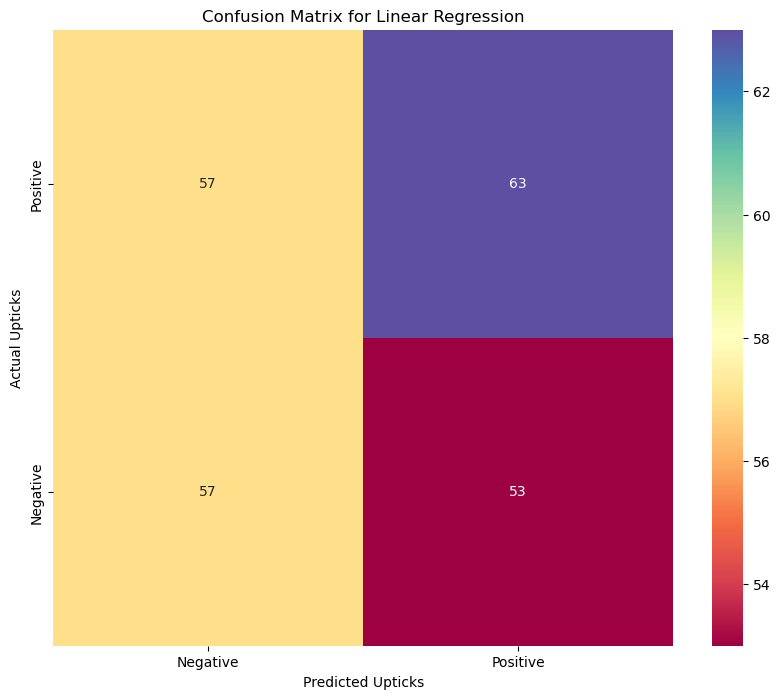

In [131]:
plot_confusion_matrix(y_pred=y_pred, y_actual=y_class, method="Linear Regression")